## Data visualization

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import os

import seaborn as sns
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

%matplotlib inline

In [2]:
# Getting the healthy audio files
healthy_aud = glob("/kaggle/input/healthy-unhealthy-audio/Healthy/*.wav")
healthy_aud

['/kaggle/input/healthy-unhealthy-audio/Healthy/116.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_107.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/66.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_32.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_9.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_60.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/17.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/88.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/138.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_63.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/136.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_29.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/85.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_129.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_82.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_45.wav',
 '/kaggle/input/healthy-unhealthy-audio/Healthy/n_89.wav',
 '/kagg

In [3]:
# Getting the unhealthy audio files
unhealthy_aud = glob("/kaggle/input/healthy-unhealthy-audio/Unhealthy/*.wav")
unhealthy_aud

['/kaggle/input/healthy-unhealthy-audio/Unhealthy/116.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_107.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/66.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_32.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_9.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_60.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/17.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/88.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_63.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_29.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/85.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_82.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_45.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_89.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/n_58.wav',
 '/kaggle/input/healthy-unhealthy-audio/Unhealthy/98.wav',
 '/kaggle/input/healthy-unhealthy-a

In [5]:
#Playing an audio file
ipd.Audio(healthy_aud[0])

In [6]:
#Playing an audio file
ipd.Audio(unhealthy_aud[2])

In [7]:
# To load the raw audio files
y_raw, sr = librosa.load(healthy_aud[0])

In [8]:
y_raw

array([0.01583507, 0.03070811, 0.03268973, ..., 0.02781656, 0.03971116,
       0.        ], dtype=float32)

In [9]:
# Getting the sample rate
sr

22050

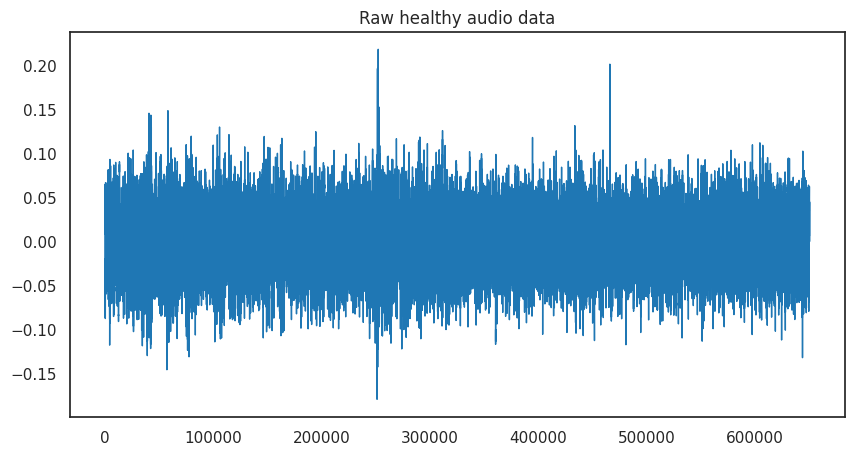

In [10]:
# Plotting the raw healthy audio data
pd.Series(y_raw).plot(figsize=(10,5), lw=1, title="Raw healthy audio data", color=color_pal[0])
plt.show();

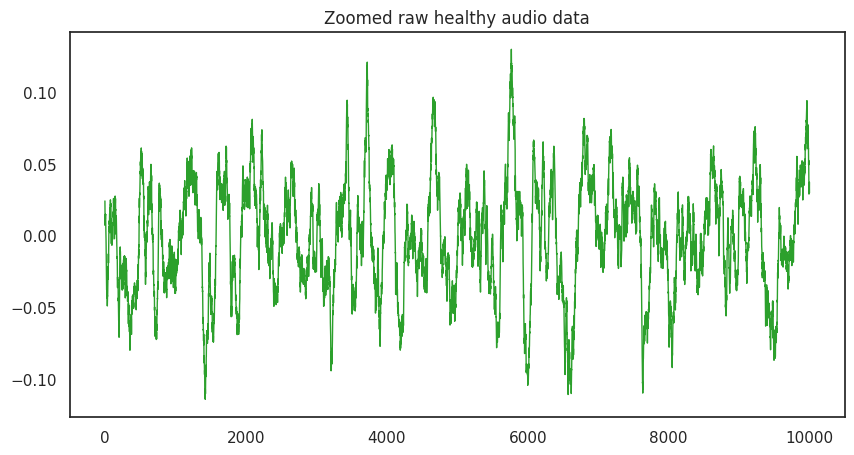

In [11]:
# Plotting the zoomed in raw healthy audio data
pd.Series(y_raw[100000:110000]).plot(figsize=(10, 5), lw=1, title="Zoomed raw healthy audio data", color=color_pal[2])
plt.show();

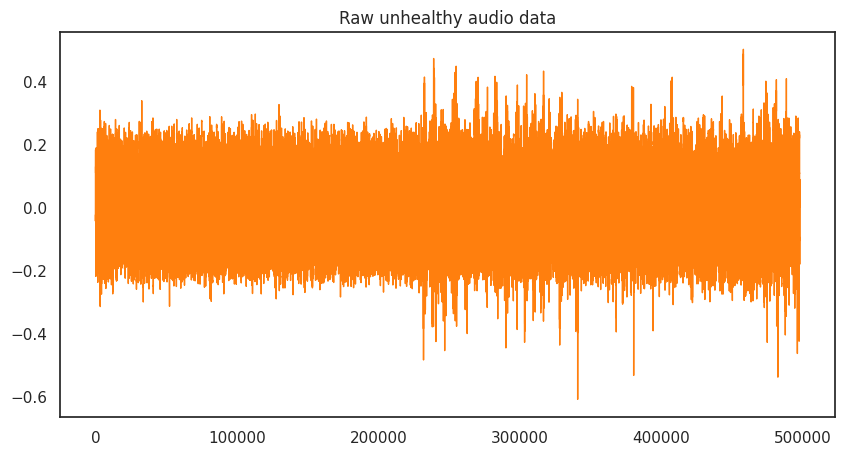

In [12]:
# To load the raw audio files
y_unh_raw, sr = librosa.load(unhealthy_aud[2])

# Plotting the raw unhealthy audio data
pd.Series(y_unh_raw).plot(figsize=(10,5), lw=1, title="Raw unhealthy audio data", color=color_pal[1])
plt.show();

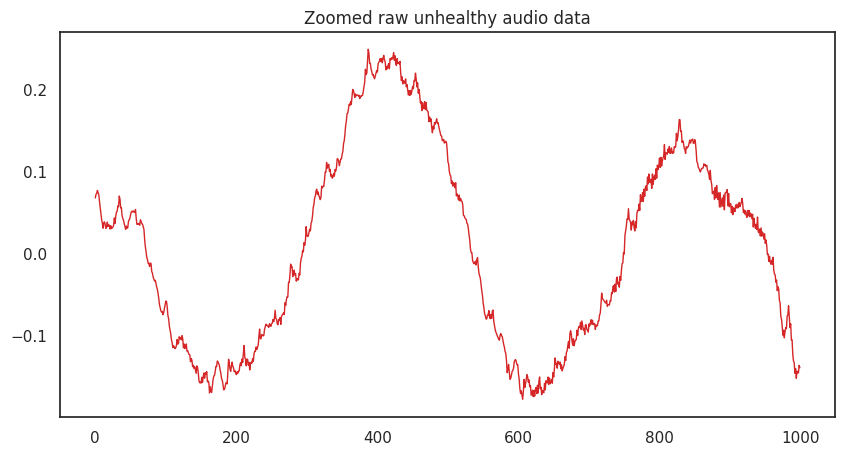

In [13]:
# Plotting the zoomed in raw unhealthy audio data
pd.Series(y_unh_raw[5000:6000]).plot(figsize=(10, 5), lw=1, title="Zoomed raw unhealthy audio data", color=color_pal[3])
plt.show();

In [14]:
# Transforming the raw audio data into a spectrogram
D = librosa.stft(y_raw)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 1270)

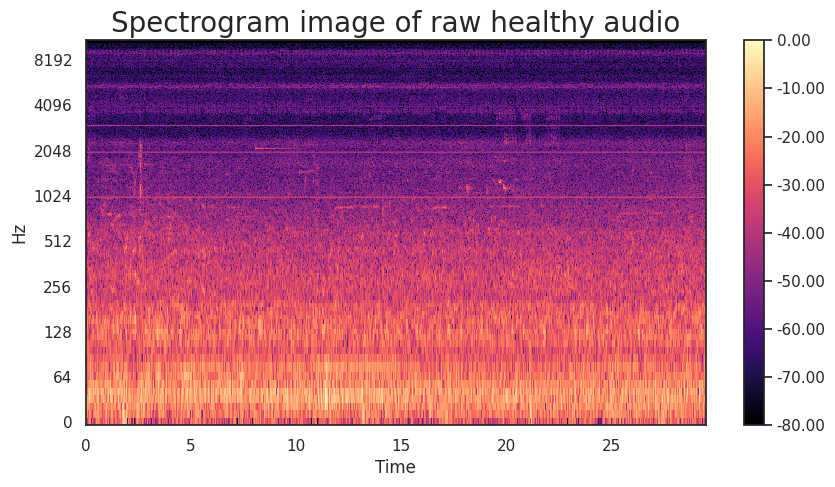

In [17]:
# Plotting the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis="time", y_axis="log", ax=ax)
ax.set_title("Spectrogram image of raw healthy audio", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show();

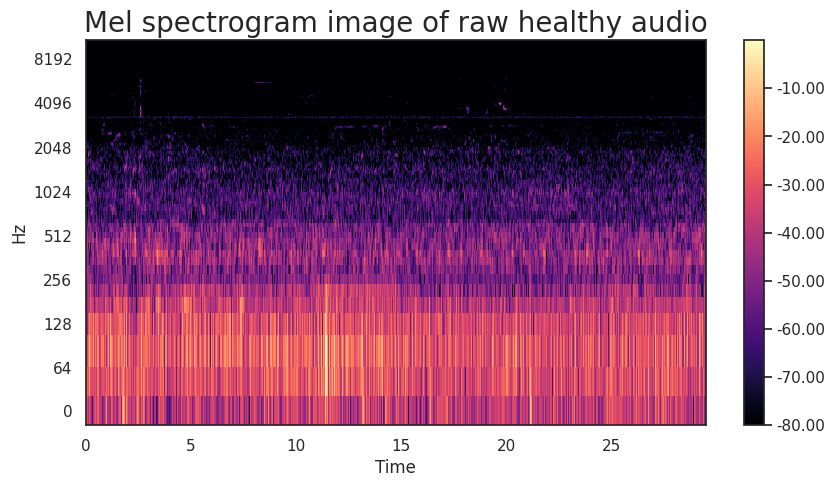

In [15]:
# Plotting a mel spectrogram of the healthy audio data
S = librosa.feature.melspectrogram(y=y_raw, sr=sr, n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis="time", y_axis="log", ax=ax)
ax.set_title("Mel spectrogram image of raw healthy audio", fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show();

In [25]:
# Creating a directory for the dataset
os.makedirs("data", exist_ok=True)

data_records = []

# Function to create a Mel spectrogram and save it
def mel_spectrogram(file_path, label, idx, n_fft=1024, hop_length=320, n_mels=64):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    plt.figure(figsize=(6, 6))
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    plt.axis("off")
    # plt.title(label, fontsize=14)
    plt.tight_layout()
    
    # Saving the figure with the label
    save_path = f"data/{label}_{idx}.png"
    plt.savefig(save_path)
    plt.close()


    # Append filename and label to the list
    data_records.append([save_path, label])

# Function to process and save all audio files
def process_and_save_audio(audio_files, label):
    for idx, file in enumerate(audio_files):
        mel_spectrogram(file, label, idx)

# Processing and saving all audio files
process_and_save_audio(healthy_aud, "healthy")
process_and_save_audio(unhealthy_aud, "unhealthy")

# # Saving records as CSV
# df = pd.DataFrame(data_records, columns=["filename", "label"])
# df.to_csv("data_labels.csv", index=False)

print("Mel spectrogram images and labels saved successfully!")


Mel spectrogram images and labels saved successfully!


In [39]:
!tar -cvf data.tar data

data/
data/unhealthy_27.png
data/unhealthy_169.png
data/unhealthy_227.png
data/healthy_213.png
data/healthy_5.png
data/healthy_18.png
data/healthy_131.png
data/unhealthy_102.png
data/healthy_266.png
data/healthy_101.png
data/healthy_39.png
data/healthy_90.png
data/healthy_93.png
data/unhealthy_175.png
data/healthy_164.png
data/healthy_74.png
data/healthy_163.png
data/healthy_205.png
data/unhealthy_62.png
data/healthy_92.png
data/healthy_184.png
data/healthy_139.png
data/unhealthy_156.png
data/healthy_217.png
data/healthy_140.png
data/unhealthy_235.png
data/healthy_85.png
data/healthy_99.png
data/healthy_231.png
data/healthy_9.png
data/unhealthy_220.png
data/healthy_227.png
data/unhealthy_107.png
data/healthy_223.png
data/healthy_265.png
data/healthy_143.png
data/healthy_41.png
data/healthy_106.png
data/healthy_48.png
data/unhealthy_170.png
data/healthy_103.png
data/unhealthy_77.png
data/healthy_256.png
data/healthy_65.png
data/healthy_146.png
data/healthy_196.png
data/healthy_234.png
d